# <h3><b>Decision Tree</b></h3>

In [11]:
import numpy as np
import pandas as pd
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

<h4> <b>Import Dataset</b></h4>

In [12]:
#Reading the dataset
df= pd.read_csv('/Users/jyoti/OneDrive/DLFinal/Project2/Datasets/MLModels.csv')
df.head(5)

,Enrollment_ID,Access,Discussion,Navigate,Page Close,Problems,Video,Session,Wiki,Total_Time,Result
0,1,178.0,0.0,0.0,0.0,148.0,47.0,15,0.0,425.933333,0
1,4,162.0,0.0,0.0,0.0,23.0,14.0,12,0.0,261.616667,0
2,9,84.0,0.0,0.0,0.0,8.0,3.0,7,0.0,340.000000,1
3,12,72.0,0.0,0.0,0.0,0.0,51.0,10,0.0,297.500000,0
4,14,112.0,0.0,0.0,0.0,32.0,10.0,9,0.0,368.800000,1


<h4><b>Data Preprocessing</b></h4>

In [13]:
#Splitting into X(Features) and Y(Label)
X = df.loc[:,['Enrollment_ID', 'Access', 'Discussion', 'Navigate', 'Page Close',
       'Problems', 'Video', 'Session', 'Wiki', 'Total_Time']] 

In [14]:
Y = df['Result']

In [15]:
#Splitting into Train and Test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6982, 10)
(1746, 10)
(6982,)
(1746,)


In [16]:
# Data Normalisation
X_train = X_train / 255
X_test = X_test / 255

<h4> <b> Model Implementation</b></h4>

In [17]:
#Model Implementation
DecisionTree_Model = DecisionTreeClassifier(max_depth=3)
DecisionTree_Model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h4><b> Results</b></h4>

In [18]:
# Model Prediction
y_prediction = DecisionTree_Model.predict(X_test)

In [19]:
# Calculation of Accuracy, Precision and Recall
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(Y_test, y_prediction)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(Y_test, y_prediction, average='weighted')))
print("Recall: "+ str(recall_score(Y_test, y_prediction, average='weighted')))
print("Accuracy: " + str(accuracy_score(Y_test, y_prediction)))

Prec: 0.807697222745005
Recall: 0.8098510882016037
Accuracy: 0.8098510882016037


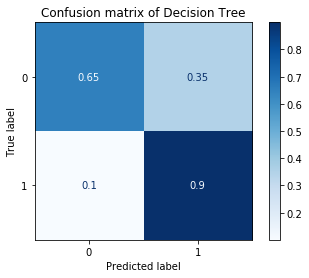

In [20]:
# Confusion Matrix
matrix = plot_confusion_matrix(DecisionTree_Model, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix of Decision Tree')
plt.show(matrix)

<h4><b> Plotting Decision Tree</b></h4>

[Text(558.0, 475.65000000000003, 'X[9] <= 0.756\ngini = 0.456\nsamples = 6982\nvalue = [2451, 4531]'),
 Text(279.0, 339.75, 'X[7] <= 0.018\ngini = 0.278\nsamples = 4709\nvalue = [785, 3924]'),
 Text(139.5, 203.85000000000002, 'X[9] <= 0.214\ngini = 0.205\nsamples = 3943\nvalue = [458, 3485]'),
 Text(69.75, 67.94999999999999, 'gini = 0.146\nsamples = 2911\nvalue = [230, 2681]'),
 Text(209.25, 67.94999999999999, 'gini = 0.344\nsamples = 1032\nvalue = [228, 804]'),
 Text(418.5, 203.85000000000002, 'X[5] <= 0.112\ngini = 0.489\nsamples = 766\nvalue = [327, 439]'),
 Text(348.75, 67.94999999999999, 'gini = 0.434\nsamples = 555\nvalue = [177, 378]'),
 Text(488.25, 67.94999999999999, 'gini = 0.411\nsamples = 211\nvalue = [150, 61]'),
 Text(837.0, 339.75, 'X[5] <= 0.143\ngini = 0.391\nsamples = 2273\nvalue = [1666, 607]'),
 Text(697.5, 203.85000000000002, 'X[9] <= 1.165\ngini = 0.486\nsamples = 1016\nvalue = [594, 422]'),
 Text(627.75, 67.94999999999999, 'gini = 0.496\nsamples = 490\nvalue = [2

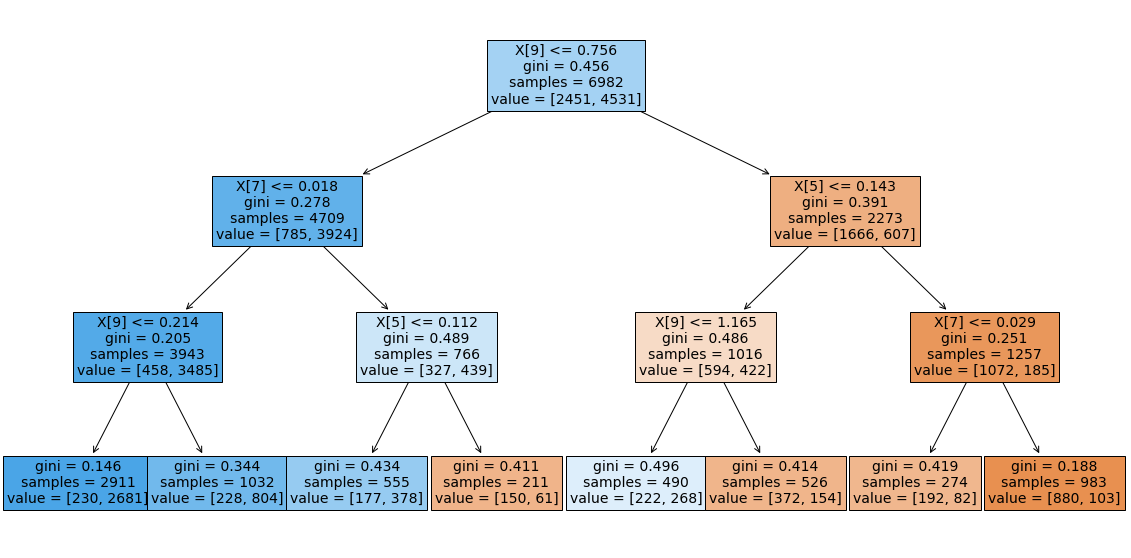

In [21]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(DecisionTree_Model, filled=True, fontsize=14)